In [17]:
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='last_expr'

from matplotlib import pyplot as plt
%pylab inline

# %load_ext autoreload
# %autoreload 2
import numpy as np
import pandas as pd 
pd.options.display.max_rows=5  # 设置dataframe最多的显示行数
import os
import os.path as osp

import sys
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print(f"After inserting, sys.path is {sys.path}")

Populating the interactive namespace from numpy and matplotlib


/home/hesy/.conda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sys', 'np', 're', 'mpl']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


After inserting, sys.path is ['/home/hesy/.conda/envs/py36/lib/python36.zip', '/home/hesy/.conda/envs/py36/lib/python3.6', '/home/hesy/.conda/envs/py36/lib/python3.6/lib-dynload', '', '/home/hesy/.conda/envs/py36/lib/python3.6/site-packages', '/home/hesy/projects/baselines', '/home/hesy/.conda/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/home/hesy/.ipython', '/home/hesy/projects/snippets-scripts']


# 真实tm

In [6]:
parDir = "/home/guifei/ns3_RL_LP_hesy/mars/DRLTE/log"

## reward没有缩放的

In [52]:
# 查看reward 以及
reward , util = [],[]
modelPath = "trueTM/100000-100"
reward = np.loadtxt(osp.join(parDir,modelPath,"rwd.log"))
util= np.loadtxt(osp.join(parDir,modelPath,"util.log"))

Text(0.5, 0.98, 'trueTM/100000-100')

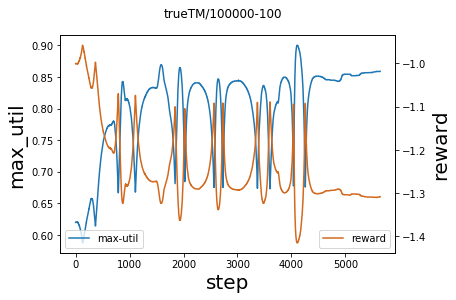

In [60]:
fig,ax = plt.subplots() # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both
ax.plot(range(len(util)),util,label="max-util")
ax.set_xlabel('step', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
ax.set_ylabel('max_util', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
ax.legend(loc='lower left')

ax2 = ax.twinx()
ax2.plot(range(len(reward)),reward,'chocolate',label="reward")
ax2.set_ylabel('reward', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
ax2.legend(loc='lower right')

fig.suptitle(modelPath)

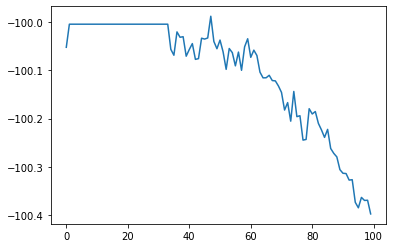

In [25]:
plt.plot(range(len(reward[:100])),reward[:100])

<br><br><br><br>

----

## 查看模型最新结果

hesy@G8 1000-1000
hesy@g5 10-100000
hesy@g14 100-10000,1000-100
0115-11:00 所有的都转移到了/home/hesy/projects/mars/DRLTE/log[-gx]  路径下

In [8]:
import os.path as osp
import numpy as np

### g5的数据(no-circle)

#### 查看有没有过拟合

要查看的值 主要是max_util的平均值 以及 lp_perf的值 （没有reward了）

In [7]:
parDir = "/home/hesy/projects/mars/DRLTE/log/log/gea-test-"
from os import path as osp

Text(0.5, 1.0, 'mean PR over test set')

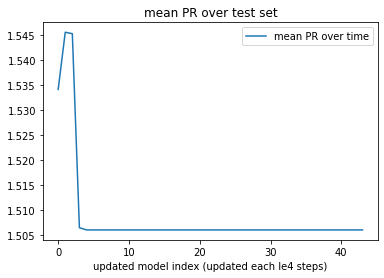

In [25]:
means = []
for i in range(1,45):
    pr = np.loadtxt( osp.join(parDir+str(i),"perfm.log") )
    means.append(pr.mean())

# 画出means的趋势查看过拟合情况
plt.plot( range(len(means)),means )
plt.legend(["mean PR over time"])
plt.xlabel("updated model index (updated each le4 steps)")
plt.title("mean PR over test set")


In [20]:
means[:7]

[1.5341897503715818,
 1.5456432492122563,
 1.545357549706874,
 1.5065002148155786,
 1.5060599166616255,
 1.5060599166616255,
 1.5060599166616255]

#### 查看最优的cdf

Text(0.5, 1.0, 'cdf of PR')

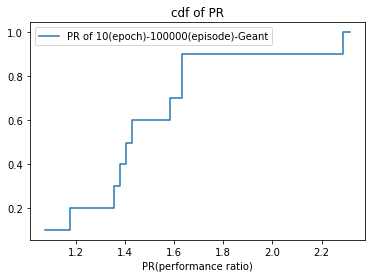

In [24]:
pr = np.loadtxt( osp.join(parDir+str(6),"perfm.log") )

####################
import statsmodels.api as sm
data = pr
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
# #绘制阶梯图
plt.step(x, y)
# datas.append({"x":x,"y":y})
plt.legend(["PR of 10(epoch)-100000(episode)-Geant"])
plt.xlabel("PR(performance ratio)")
plt.title("cdf of PR")


### g8的数据

#### 查看有没有过拟合

要查看的值 主要是max_util的平均值 以及 lp_perf的值 （没有reward了）

In [30]:
parDir = "/home/hesy/projects/mars/DRLTE/log/log/abi-test-9"
from os import path as osp

In [32]:
# index = 0  # 24
# means=[]
minValue=10
for tm_circle in [5,10]:
    for len_cicle in [100,5000]:
        for mini_batch in [64,128]:
            for seed in [66,3,109]:
                pr = np.loadtxt( osp.join(parDir+f"-{tm_circle}-{len_cicle}-{mini_batch}-{seed}","perfm.log") )
                tmp=pr.mean()
#                 means.append(pr.mean())
                print(f"{tmp} of tm_circle:{tm_circle}-len_cicle:{len_cicle}-mini_batch:{mini_batch}-seed:{seed}")
                if minValue > tmp:
                    minValuelue = tmp
#                     print(f"\t min para is {tm_circle}-{len_cicle}-{mini_batch}-{seed} of {tmp}")
                

1.530442520055783 with shape (500,)
	 min para is 5-100-64-66 of 1.530442520055783
1.5717849518909512 with shape (500,)
	 min para is 5-100-64-3 of 1.5717849518909512
1.5087808538953722 with shape (500,)
	 min para is 5-100-64-109 of 1.5087808538953722
1.6569435727764397 with shape (500,)
	 min para is 5-100-128-66 of 1.6569435727764397
1.6868772270325227 with shape (500,)
	 min para is 5-100-128-3 of 1.6868772270325227
1.7696724957091694 with shape (500,)
	 min para is 5-100-128-109 of 1.7696724957091694
1.4773958816861676 with shape (500,)
	 min para is 5-5000-64-66 of 1.4773958816861676
1.5144104497960496 with shape (500,)
	 min para is 5-5000-64-3 of 1.5144104497960496
1.4166411700221633 with shape (500,)
	 min para is 5-5000-64-109 of 1.4166411700221633
1.3052282751923123 with shape (500,)
	 min para is 5-5000-128-66 of 1.3052282751923123
1.3260845227460114 with shape (500,)
	 min para is 5-5000-128-3 of 1.3260845227460114
1.2738829669777778 with shape (500,)
	 min para is 5-5000-

Text(0.5, 1.0, 'mean PR over test set')

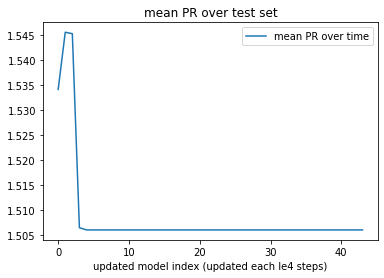

In [25]:
means = []
for i in range(1,45):
    pr = np.loadtxt( osp.join(parDir+str(i),"perfm.log") )
    means.append(pr.mean())

# 画出means的趋势查看过拟合情况
plt.plot( range(len(means)),means )
plt.legend(["mean PR over time"])
plt.xlabel("updated model index (updated each le4 steps)")
plt.title("mean PR over test set")


In [20]:
means[:7]

[1.5341897503715818,
 1.5456432492122563,
 1.545357549706874,
 1.5065002148155786,
 1.5060599166616255,
 1.5060599166616255,
 1.5060599166616255]

#### 查看最优的cdf

Text(0.5, 1.0, 'cdf of PR')

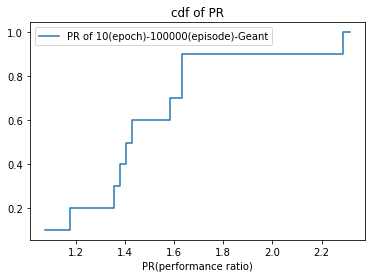

In [24]:
pr = np.loadtxt( osp.join(parDir+str(6),"perfm.log") )

####################
import statsmodels.api as sm
data = pr
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
# #绘制阶梯图
plt.step(x, y)
# datas.append({"x":x,"y":y})
plt.legend(["PR of 10(epoch)-100000(episode)-Geant"])
plt.xlabel("PR(performance ratio)")
plt.title("cdf of PR")


### 查看目前为止，训练的reward以及util

In [39]:
def plot_reward_util(dirPath, epoch, episode):
    plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)
    
    reward, util = [], []
    reward = np.loadtxt(osp.join(dirPath, f"{epoch}-{episode}", 'rwd.log'))
    util = np.loadtxt(osp.join(dirPath, f"{epoch}-{episode}", 'util.log'))

    """双轴"""
#     fig,axes = plt.subplots(1,3) # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both
    fig,ax = plt.subplots() # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both
#     ax = axes[0]
    ax.plot(range(len(util)),util,label="max-util")
    ax.set_xlabel('step', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
    ax.set_ylabel('max_util', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
    ax.legend(loc='lower left')

    ax2 = ax.twinx()
    ax2.plot(range(len(reward)),reward,'chocolate',label="reward")
    ax2.set_ylabel('reward', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
    ax2.legend(loc='lower right')
    fig.suptitle(f"{epoch}-{episode}")

    """单独的逻辑"""
    fig,axes = plt.subplots(1,2) # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both

    axes[0].plot(range(len(util)),util,label="max-util")
    axes[0].set_title("max-util")
    axes[1].plot(range(len(reward)),reward,label="reward")
    axes[1].set_title("reward")

    fig.suptitle(f"{epoch}-{episode}")
    
    return reward, util

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([-4.55170559, -4.55054782, -4.55054782, ..., -5.27739664,
        -5.27739664, -5.27739664]),
 array([0.6199, 0.6197, 0.6197, ..., 0.656 , 0.656 , 0.656 ]))

<Figure size 432x288 with 0 Axes>

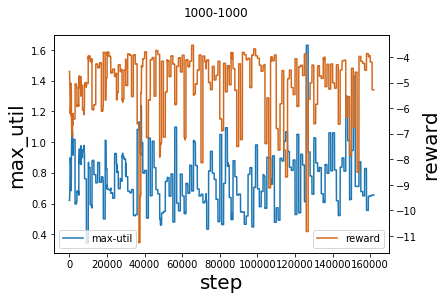

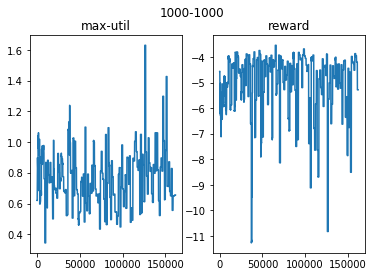

In [40]:
dirPath="/home/hesy/projects/mars/DRLTE/log/trueTM"
plot_reward_util(dirPath ,1000,1000 )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([-4.55170559, -4.55037792, -4.55037792, ..., -4.60403427,
        -4.60403427, -4.60403427]),
 array([0.6199, 0.6197, 0.6197, ..., 1.3571, 1.3571, 1.3571]))

<Figure size 432x288 with 0 Axes>

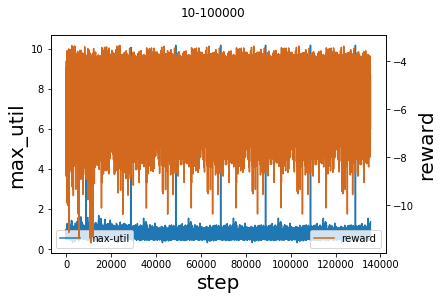

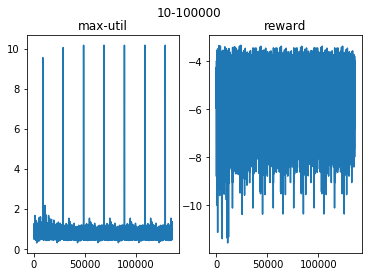

In [42]:
dirPath="/home/hesy/projects/mars/DRLTE/log-g5/trueTM"
plot_reward_util(dirPath ,10,100000 )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([-4.55170559, -4.55569643, -4.55569945, ..., -4.72381628,
        -4.72381628, -4.72381628]),
 array([0.6199, 0.6205, 0.6205, ..., 0.6509, 0.6509, 0.6509]))

<Figure size 432x288 with 0 Axes>

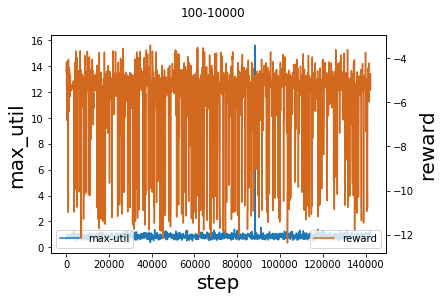

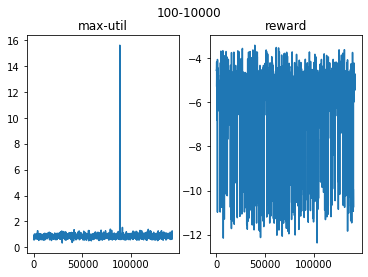

In [43]:
dirPath="/home/hesy/projects/mars/DRLTE/log-g14/trueTM"
plot_reward_util(dirPath ,100,10000 )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([-4.55170559, -4.54810903, -4.54810903, ..., -4.59608514,
        -4.59608758, -4.59608758]),
 array([0.6199, 0.6193, 0.6193, ..., 0.7832, 0.7832, 0.7832]))

<Figure size 432x288 with 0 Axes>

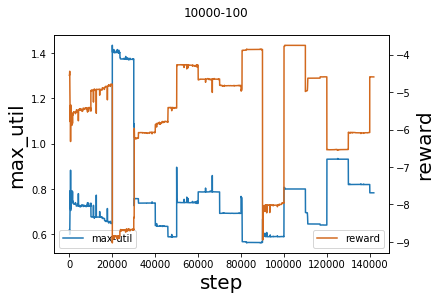

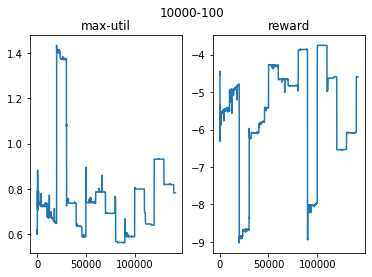

In [44]:
dirPath="/home/hesy/projects/mars/DRLTE/log-g14/trueTM"
plot_reward_util(dirPath ,10000,100 )

## 查看测试集的performance ratio

In [47]:
dirPath = "/home/hesy/projects/mars/DRLTE/log/trueTM-test"
data_10 = "10-100000"
data_100 = "100-10000"
data_1000 = "1000-1000"
data_10000 = "10000-100"

In [50]:
def plot_perf(dirPath ,train_para,file="perfm.log"):
    data = np.loadtxt(osp.join(dirPath ,train_para,"perfm.log"))
    return data

In [51]:
datas=[]
datas.append( plot_perf(dirPath,data_10) )
datas.append( plot_perf(dirPath,data_100) )
datas.append( plot_perf(dirPath,data_1000) )
datas.append( plot_perf(dirPath,data_10000) )


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

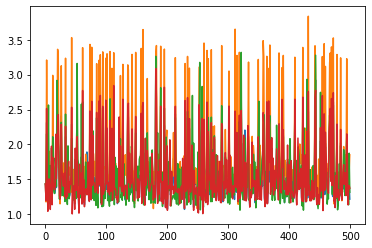

In [52]:
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                bottom=0.01, 
                right=1, 
                top=1, 
                wspace=0.2, 
                hspace=0.2)

titles=["epoch=10","epoch=100","epoch=1000","epoch=10000"]
fig,axes = plt.subplots(2,2) # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both

for index,data in enumerate(datas):
    axes[index//2,index%2].plot(range(len(util)),util,label="max-util")
    axes[index//2,index%2].set_title(titles[index])
    
fig.suptitle(f"performance ratio")

# 查看各参数 各模型过拟合情况

In [ ]:
# 对于每个参数都要测一下
    # 对于每个模型都要跑一下
bash for 循环
存储结果的时候需要把模型的轮数也作为文件名命名的一个参数

# 对于每个模型都要算一下
这部分可以在